<font size="5">YSC 2239: Introduction to Data Science Final Project</font>

<font size="5">Stage 2: Presentation </font>

## Project Guidelines 

_(Taken from course canvas page)_

Introduction: Outline your main research question.

<ins>EDA<ins>: 
    
Do some exploratory data analysis to tell an interesting story about your data. Instead of limiting yourself to relationships between just two variables, broaden the scope of your analysis and employ creative approaches that evaluate relationships between more than two variables.

<ins>Research question: <ins>
    
Use one of your research questions, or come up with a new one depending on feedback from the proposal. If applicable, perform a hypothesis test to answer your question. If you do, make sure to check any applicable assumptions. If you do not use a hypothesis test, use other means to show what answer the data provide.

<ins>Prediction: <ins>
    
Predict or classify one variable in your dataset from other variables. Motivate why you choose the outcome and its predictors. Evaluate the performance of your predictive model or the resulting classifier using appropriate metrics and visualizations. Remark: While the other parts of your presentation should nicely fit together as one whole, this prediction part might not fit as nicely, depending on your research question or data narrative. That is okay.

<ins>Conclusion:<ins> 
    
A brief summary of your findings from the previous sections without repeating your statements from earlier as well as a discussion of what you have learned about the data and your research question(s). You should also discuss any shortcomings of your current study, either due to data collection or methodology, and include ideas for possible future research.

# Introduction

We have chosen a healthcare dataset from Kaggle that has information on several health metrics like bmi and average glucose levels. The data set also has information on whether the patient has had a stroke or not. 

## Load packages 

In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf


%matplotlib inline
sns.set()
sns.set_context("talk")

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## Load Dataset

In [2]:
stroke = pd.read_csv (r'stroke\stroke.csv', encoding = 'windows-1254')

#st - so that I can see the column names without typing the full thing
st = stroke.head(1)

# Exploratory Data Analysis

## Visualisation

### Shape

In [3]:
print('First Five Rows')
display(stroke.head())
print("The dimensions of the data frame are", stroke.shape)

First Five Rows


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The dimensions of the data frame are (5110, 12)


|Index| Column Name | Data Type | Description|
| --- |:--- |:--- |:--- |
|1. | `'gender'`| Categorical| Male/Female/Other|
|2.|  `'age'`|Numeric| Range of 0.08 (presumably babies) to 82 years old|
|3. | `'hypertension`|Binary| 0/1|
|4.|  `'heart_disease'`|Binary| 0/1|
|5. | `'ever_married' ` |Binary| Yes/No|
|6.  |`'work_type'`|Categorical| 'Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked' |
|7.  |`'Residence_type'`|Categorical| 'Urban', 'Rural'|
|8.  |`'avg_glucose_level'`|Numerical| 55.12- 274.74. Normal Adult range: 90-110 mg/dL|
|9.  |`'bmi'`|Numerical|10.3 - 97.6. 18-25 is considered healthy|
|10. |`'smoking_status'`|Categorical|'formerly smoked', 'never smoked', 'smokes', 'Unknown'|

###  Imbalanced Data

Text(0.5, 1.0, 'Patients \n non-stroke = 0, stroke = 1')

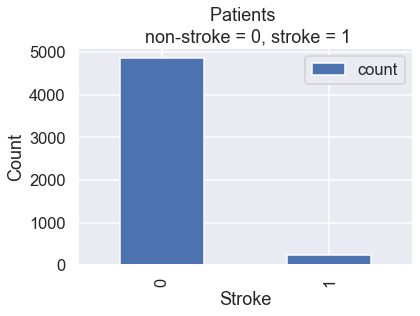

In [4]:
n_stroke_df = stroke.groupby('stroke').agg('count').iloc[:,:1].rename(columns = {'id':'count'})
n_stroke_df.plot.bar()
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.title("Patients \n non-stroke = 0, stroke = 1")

It is concerning that we have an imbalanced dataset. This is because if we train our model on this imbalanced dataset, we will train the model to better predict a "no-stroke" outcome. However, that is not our goal. We would rather be safe than sorry and tell someone to prepare for a possibility of stroke rather than tell someone they will not have stroke but they do end up having one.

### Check for NA values

We would like to check for NA values which might cause an error if we were to run a logistic regression.

In [5]:
stroke.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The data set has 201 rows that have NA in the bmi column. We need to drop them, but first we need to investigate the distribution of those NA rows. 

Text(0.5, 1.0, 'Distribution of NA rows \n non-stroke = 0, stroke = 1')

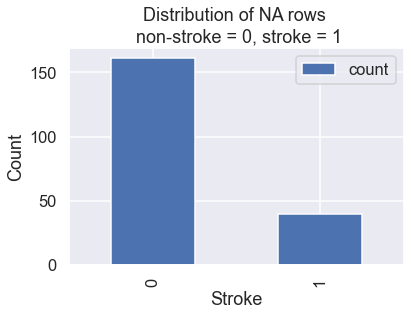

In [6]:
stroke[stroke['bmi'].isnull()].groupby('stroke').agg('count').iloc[:,:1].rename(columns = {'id':'count'}).plot.bar()
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.title("Distribution of NA rows \n non-stroke = 0, stroke = 1")

The distribution is uneven, and there's a higher proportion of people who have had strokes than in the whole dataset. We are removing more stroke data from an already imbalanced data set. 


But we need to remove the NA values regardless because we need the dataset to be fully numerical before we can use one-hot encoding to fit a regression model.

In [7]:
print('Checking that no more NA values are in the data set.')
print(stroke.drop('id',axis = 1).dropna(axis = 0).isnull().sum())
stroke = stroke.dropna(axis = 0)

Checking that no more NA values are in the data set.
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


After dropping the NA values,

1) The stroke data set has 4909 observations, and 10 features.

2) 209 stroke patients and 4700 non-stroke patients. The data is still severly imbalanced.

In [8]:
print('Number of stroke and non-stroke data. Non-stroke = 0, stroke = 1')
stroke.groupby('stroke').agg('count').iloc[:,:1]

Number of stroke and non-stroke data. Non-stroke = 0, stroke = 1


,id
stroke,
0,4700
1,209


### BMI v. Age

This is what we see when we split the data.

Text(0.5, 1.0, 'Stroke')

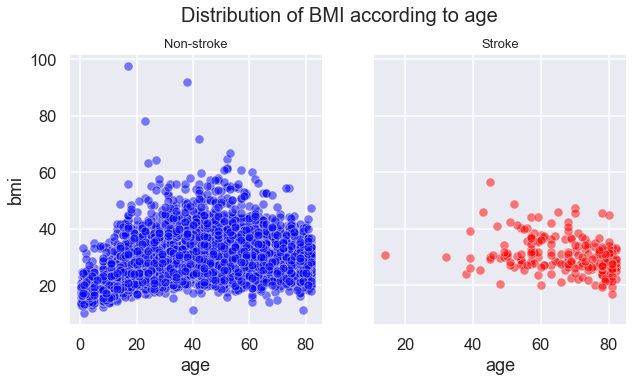

In [9]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Distribution of BMI according to age', fontsize = 20, y = 1.01)

sns.scatterplot(ax=axes[0], data=stroke[stroke.stroke == 0], x="age", y="bmi", color = 'blue'
                ,alpha = 0.5)
sns.scatterplot(ax=axes[1],data=stroke[stroke.stroke == 1], x="age", y="bmi", color = 'red',
                alpha = 0.5)

axes[0].set_title('Non-stroke', fontsize = 13)
axes[1].set_title('Stroke', fontsize = 13)

Observations: BMI is equally spread over the range of 15 to 60 for each of the stroke and non-stroke cases. 

Stroke patients are represented by older people as observed along the age axis. 

### Glucose v. Age

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Average Glucose Level'),
 Text(0.5, 1.0, 'Non-stroke')]

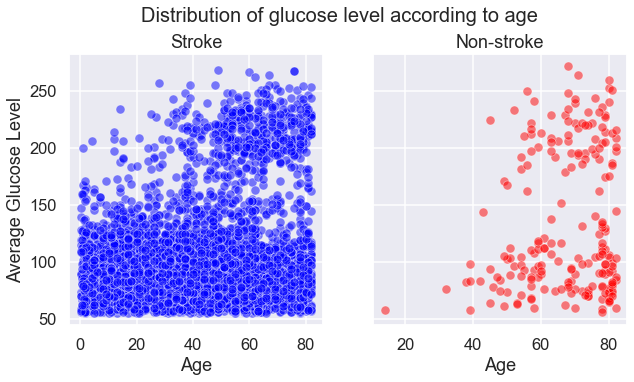

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Distribution of glucose level according to age', fontsize = 20, y = 1.01)

sns.scatterplot(ax=axes[1], data=stroke[stroke.stroke == 1], x="age", y="avg_glucose_level", color = 'red', alpha = 0.5)
sns.scatterplot(ax=axes[0],data=stroke[stroke.stroke == 0], x="age", y="avg_glucose_level", color = 'blue', alpha = 0.5)

axes[0].set(xlabel='Age', ylabel='Average Glucose Level', title='Stroke')
axes[1].set(xlabel='Age', ylabel='Average Glucose Level', title='Non-stroke')

There are no obvious groups for average glucose levels. 

### Bootstrap to understand if age matters

In this section, we will use bootstrap to find out if the mean age is statistically significant. 

Our method:

1. Shuffled rows
2. Calculates the mean age for stroke
3. Repeat 500 times
4. Plot histogram



These are the observed mean ages for non-stroke and stroke categories.

In [11]:
obs_mean_no_stroke = stroke.groupby('stroke').agg('mean')['age'][0]
obs_mean_stroke = stroke.groupby('stroke').agg('mean')['age'][1]



print(f'''Mean of non-stroke age: {obs_mean_no_stroke},
Mean of stroke age: {obs_mean_stroke}''')

Mean of non-stroke age: 41.76045106382981,
Mean of stroke age: 67.71291866028709


Step 1: Create function to perform bootstrapping.

In [12]:
#create function that 
#1. shuffled rows
#2. Calculates the mean age for stroke
#3. Repeat 500 times

mean_age_stroke_bootstrap = []
mean_age_no_stroke_bootstrap = []

for i in np.arange(500):
    stroke_shuffled = np.random.choice(stroke['stroke'], size = len(stroke['stroke']), replace = True)
    stroke_shuffled
    stroke_bootstrap = stroke.copy()
    stroke_bootstrap['stroke_shuffled'] = stroke_shuffled
    
    #take out mean age of no-stroke patients
    mean_no_stroke = stroke_bootstrap.groupby('stroke_shuffled').agg('mean')['age'][0]
    
    #take out mean age of stroke patients
    mean_stroke = stroke_bootstrap.groupby('stroke_shuffled').agg('mean')['age'][1]
    
    #append results to array
    mean_age_no_stroke_bootstrap = np.append(mean_age_no_stroke_bootstrap, mean_no_stroke)
    mean_age_stroke_bootstrap = np.append(mean_age_stroke_bootstrap, mean_stroke)
    

2. Put bootstrapped mean ages into data frame.

In [13]:
bootstrap_age = pd.DataFrame({
    'bs_no_stroke' : mean_age_no_stroke_bootstrap,
    'bs_stroke': mean_age_stroke_bootstrap
})

bootstrap_age.head()

,bs_no_stroke,bs_stroke
0,42.894222,42.178990
1,42.683694,46.737636
2,42.983079,40.257547
3,42.804585,44.192558
4,42.835998,43.519431


3. Plot histogram

[Text(0.5, 0, 'Mean Age'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Stroke \n Observed: 61.7')]

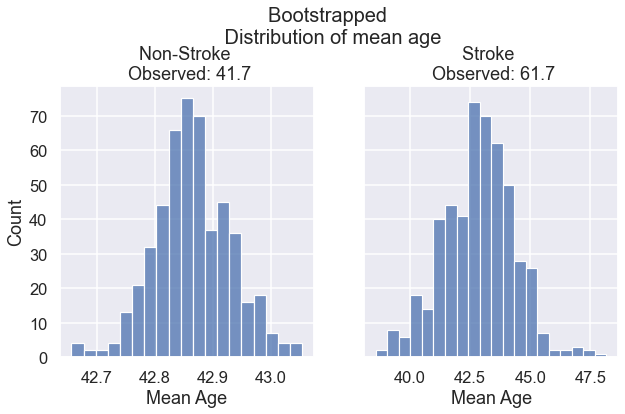

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Bootstrapped \n Distribution of mean age', fontsize = 20, y = 1.1)

sns.histplot(ax = axes[0], data=bootstrap_age, x="bs_no_stroke")
sns.histplot(ax = axes[1],data=bootstrap_age, x="bs_stroke")

axes[0].set(xlabel='Mean Age', ylabel='Count', title='Non-Stroke \n Observed: 41.7')
axes[1].set(xlabel='Mean Age', ylabel='', title='Stroke \n Observed: 61.7')

We can see that the observed mean age for stroke lies outside the 97.5 percentile of the bootstrapped mean for stroke patients. The range of values for the graph on the right only goes to around 50 years old. Therefore we can determine that age is statistically significant factor to predict stroke. 

## SMOTE

### One-hot Encoding

SMOTE will help to solve the issue of the imbalanced data set. It does so by oversampling stroke patients and understampling non-stroke patients.

In order to use SMOTE, we will have to encode categorical data into numerical data first.



In [15]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()

#Use one_hot_encoding taken from Hw07
def one_hot_encode(data):
    return pd.get_dummies(data)

one_hot_stroke = one_hot_encode(stroke)
one_hot_stroke.head()

#We have 201 nas in the bmi section, let's remove them.
one_hot_stroke.drop('id',axis = 1).isnull().sum() 

#remove id column as well, as it's irrelevant for predictions
stroke_learning = one_hot_stroke.drop('id',axis = 1).dropna(axis = 0)

The data frame below is ready to be split for training and testing.

In [16]:
stroke_learning

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


###  SMOTE Resample

In [17]:
#load imblearn package
import imblearn
from imblearn.over_sampling import SMOTE 

In [18]:
#Assign features to X
X = stroke_learning.drop('stroke', axis = 1)

#Assign target variable to Y
Y = stroke_learning.stroke

display(X.head(3))
display(Y.head(3))

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


0    1
2    1
3    1
Name: stroke, dtype: int64

In [19]:
# transform the dataset with SMOTE
#oversample minority class
#undersample majority class

#code taken from:https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

sm = SMOTE(random_state=42)

X_sm, Y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (4909, 21)
Shape of X after SMOTE: (9400, 21)


In [20]:
#merge the two data frames back again
stroke_sm = X_sm.copy()
stroke_sm['stroke_sm'] = Y_sm

print('First 5 rows of new stroke data frame, adjusted with resampling')
stroke_sm.head(5)


First 5 rows of new stroke data frame, adjusted with resampling


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_sm
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,80.0,0,1,105.92,32.5,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
2,49.0,0,0,171.23,34.4,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
3,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
4,81.0,0,0,186.21,29.0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1


In [21]:
org_sum = stroke.groupby('stroke').agg('count').iloc[:,:1].rename(columns = {'id':'count'}).reset_index()
smote_sum = stroke_sm.groupby('stroke_sm').agg('count').iloc[:,:1].rename(columns = {'age':'count'}).reset_index()

In [22]:
org_sum
smote_sum

,stroke_sm,count
0,0,4700
1,1,4700


In [1]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Comparison, Non-stroke = 0, Stroke = 1 ', fontsize = 20, y = 1.01)


sns.barplot(ax=axes[0], data=org_sum, x = 'stroke', y = 'count')

sns.barplot(ax=axes[1], data=smote_sum, x = 'stroke_sm', y = 'count')


axes[0].set(xlabel='Stroke', ylabel='sample size', title='Original')
axes[1].set(xlabel='Stroke', ylabel='sample size', title='SMOTE')

NameError: name 'plt' is not defined

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'BMI')]

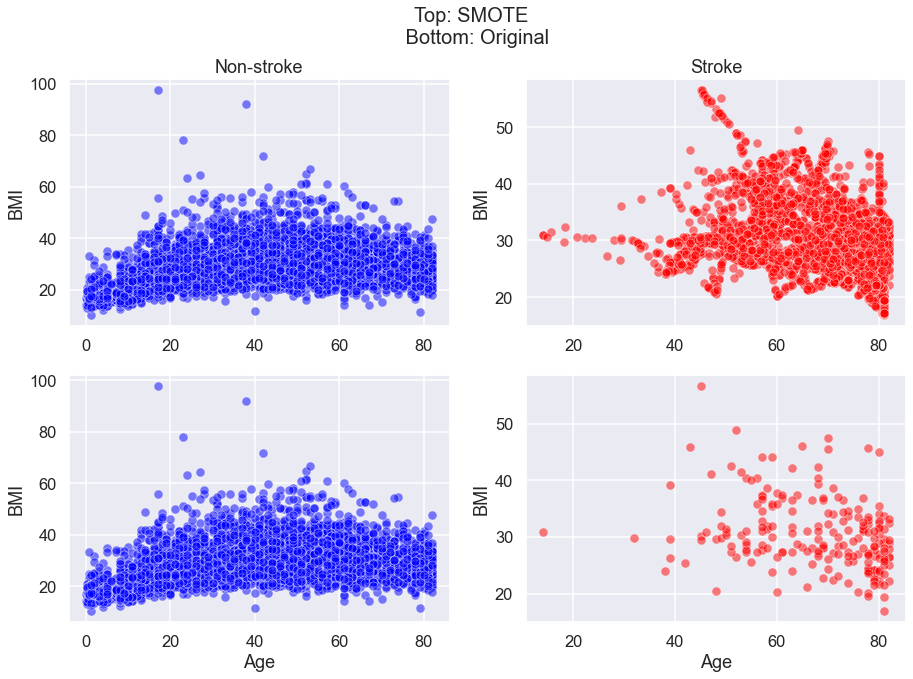

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Top: SMOTE \n Bottom: Original', fontsize = 20)

sns.scatterplot(ax=axes[0,0], data=stroke_sm[stroke_sm.stroke_sm == 0], x="age", y="bmi", color = 'blue'
                ,alpha = 0.5)
sns.scatterplot(ax=axes[0,1],data=stroke_sm[stroke_sm.stroke_sm == 1], x="age", y="bmi", color = 'red',
                alpha = 0.5)
sns.scatterplot(ax=axes[1,0], data=stroke[stroke.stroke == 0], x="age", y="bmi", color = 'blue'
                ,alpha = 0.5)
sns.scatterplot(ax=axes[1,1],data=stroke[stroke.stroke == 1], x="age", y="bmi", color = 'red',
                alpha = 0.5)

axes[0,0].set(xlabel='', ylabel='BMI', title='Non-stroke')
axes[0,1].set(xlabel='', ylabel='BMI', title='Stroke')
axes[1,0].set(xlabel='Age', ylabel='BMI')
axes[1,1].set(xlabel='Age', ylabel='BMI')

As seen from the scatterplots above, SMOTE keeps the original majority class sample the same while oversampling from the minority class.

# Research Question

We would like to predict stroke (no-stroke = 0, stroke = 1). This would be a binary classification model, which means that we are trying to predict whether the person will have a stroke depending on the other columns in the dataframe. 

# Prediction

In this section we will use a total of four models to predict stroke. 

1. Logistic Regression (trained on non-SMOTE transformed data)
2. Logistic Regression (trained on SMOTE transformed data)
3. 5-feature logistic regression (after feature engineering; trained on SMOTE transformed data)
3. K-Nearest Neighbour Classifier (find the best k value)

Our metric for testing the models:

i. increase True Positives (Those who are going to have a stroke and are told so)

ii. decrease False Positives  (Those who are not going to have a stroke, but are told they will)

We will test the performance of our model on the **original test data** for consistency, instead of the SMOTE transformed data. 

## Model 1 : Logistic regression (without SMOTE)

###  Split Data

In [25]:
# Create a 75-25 train-test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 3681
Test Data Size: 1228


In [26]:
X = stroke_learning.drop('stroke', axis = 1)
X.head(1)
Y = stroke_learning.stroke
Y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

### Fit Model

In [27]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr_model = lr.fit(x_train,y_train) 
train_accuracy = np.mean(lr_model.predict(x_train) == y_train)

print(f"Train accuracy: {train_accuracy:.4f}")

Train accuracy: 0.9606


### Model Predictions

Confusion matrix, without normalization
[[3535    0]
 [ 145    1]]
Normalized confusion matrix
[[1.         0.        ]
 [0.99315068 0.00684932]]


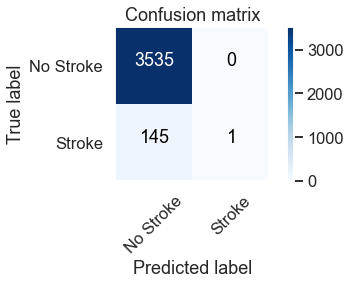

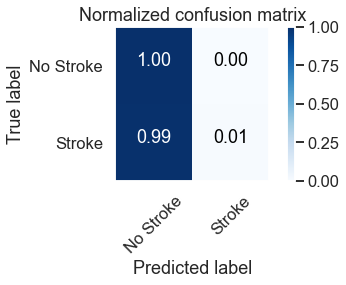

In [28]:
#Confusion matrix, code taken from Lab 10

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, lr_model.predict(x_train))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['No Stroke', 'Stroke']
# Plot non-normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [29]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

print('Proportion of correct predictions',accuracy_score(y_train, lr.predict(x_train)))

print('% True Positives (aka actually predicting someone with stroke)', recall_score(y_train, lr.predict(x_train)))

print('% False Positives', 0.00)

Proportion of correct predictions 0.9606085302906818
% True Positives (aka actually predicting someone with stroke) 0.00684931506849315
% False Positives 0.0


### Discussion

Even though model 1 showed a high accuracy of 0.96 when predicting the `y_train` data, the model faired very poorly on predicting true positives.

## Model 2: Logistic regression (with SMOTE)

### Split Data

In [30]:
# Create a 75-25 train-test split
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, Y_sm, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train_sm)}")
print(f"Test Data Size: {len(x_test_sm)}")

Training Data Size: 7050
Test Data Size: 2350


### Fit Model

In [31]:
lr_model_smote = lr.fit(x_train_sm, y_train_sm) 
train_accuracy_sm = np.mean(lr_model_smote.predict(x_train_sm) == y_train_sm)

print(f"Train accuracy: {train_accuracy_sm:.4f}")

Train accuracy: 0.9506


### Model Predictions

Confusion matrix, without normalization
[[3442   93]
 [ 124   22]]
Normalized confusion matrix
[[0.97369165 0.02630835]
 [0.84931507 0.15068493]]


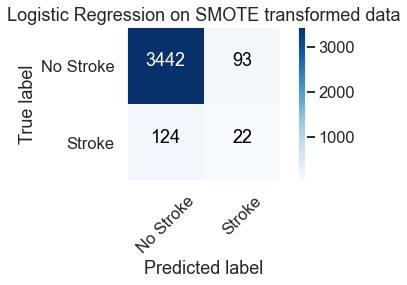

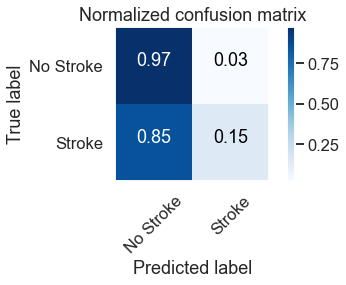

In [32]:
# cfm_smote = confusion_matrix(y_train, lr_model_smote.predict(x_train))

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, lr_model_smote.predict(x_train))
                      ,classes=class_names, normalize=False,
                      title='Logistic Regression on SMOTE transformed data')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, lr_model_smote.predict(x_train))
                      ,classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Discussion

We see here that we have slightly increased our stroke predictions to 15% , up from 0%. Model 2 also misdiagnosed 3% (93 rows) to have stroke when they actually did not have stroke. Model 2 is an improvement from model 1 but it can be better. 

## Cross Validation and Feature Engineering 

The previous two models performed well on the training data and accuracy, but did poorly on the original data and predicting true positives. This indicates that the models are not generalised enough. 

We will now use cross validation, feature engineering and cross entropy loss on model 2 to improve its accuracy.

__Cross Validation__

We will apply cross validation to get the mean 'true-positive', 'false-positives' and average cross entropy loss.

__Feature engineering__

We would like to check and see how number of features in the model reduces the loss of the model and hopefully helps us to build a better model. 

__Cross Entropy Loss__

We will measure the loss using cross entropy, since it is more suited for logistic regression.

### Define Functions

Function 1: Cross Entropy Function

Calculates the cross entropy of a single observation.

In [33]:
#taken from lec 19 on logistic regression
def cross_entropy(y, yhat):
    return - y * np.log(yhat) - (1 - y) * np.log(1 - yhat)

Function 2: Mean Cross Entropy Function

Calculates the mean cross entropy for all observations in the data set.

In [34]:
#This code below extracts the mean cross entropy loss
#It take sin the predicted probabilities for y == 1 and calculates the cross entropy 
#against the y_train data
def mean_ce(pred_proba): 
    lr_proba = []

    for i in np.arange(len(pred_proba)):
        #extract probability for y == 1
        lr_proba_new = pred_proba[i][1]
        lr_proba = np.append(lr_proba, lr_proba_new)

    return np.average(cross_entropy(y_train, lr_proba))

Function 3: Compute Cross Validation Error
    
Adapted from Lab 09 on Feature Engineering and Cross Validation. 

It uses a 4-fold validation to get the average values of three things:

1. True Positive

2. False Positive

3. Mean Cross Entropy 

In [35]:
from sklearn.model_selection import KFold

def compute_CV_error2(model, X_train, Y_train, new_x_train):
    #four fold validation
    kf = KFold(n_splits=4) 
    
    #initialise arrays
    true_p_array = []
    false_p_array = []
    cross_entropy_array = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        #X_train is a df
        #Y_train is a series
        split_X_train, split_X_valid = X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        #Fit the model on the training split
        lr_smote_model2 = model.fit(split_X_train, split_Y_train)
        #Predict
            #Predictions (0/1)
        y_valid_pred = lr_smote_model2.predict(new_x_train)
            #Probabilities
        y_valid_proba = lr_smote_model2.predict_proba(new_x_train)
        
        ######################################################################
        #extract the true positive on the validation split
        true_p    = 100 * confusion_matrix(y_train, y_valid_pred).ravel()[3]/ sum(y_train == 1)
    
        #extract false positive [2] using .ravel()
        false_p   = 100* confusion_matrix(y_train, y_valid_pred).ravel()[2]/sum(y_train == 0)
        
        #extract cross entropy
        cross_entropy_1 = mean_ce(y_valid_proba)
        
        #store results in arrays
        true_p_array  = np.append(true_p_array,  true_p)
        false_p_array = np.append(false_p_array, false_p)
        cross_entropy_array = np.append(cross_entropy_array, cross_entropy_1)
        
    return np.average(true_p_array), np.average(false_p_array), np.average(cross_entropy_array)

### Apply Functions

Code below adapted from Lab 09.

In [36]:
best_true_pos = []
best_false_pos = []
best_ce = []

range_of_num_features = range(1, X_sm.shape[1] + 1)
range_of_num_features

for N in range_of_num_features:
    print(f"Trying first {N} features")
    
    X_train_first_N_features = x_train_sm.iloc[:, :N]   
    model = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')
    new_model = model.fit(X_train_first_N_features, y_train_sm)
    # compute the cross validation error
    performance = compute_CV_error2(new_model,X_train_first_N_features,y_train_sm,x_train.iloc[:, :N]  )
    
    print("% True Positive:", performance[0])
    print("% False Positives:", performance[1])
    print("Mean Cross Entropy Loss:", performance[2])
    best_true_pos  = np.append(best_true_pos, performance[0])
    best_false_pos = np.append(best_false_pos, performance[1]) 
    best_ce        = np.append(best_ce, performance[2])

Trying first 1 features
% True Positive: 76.7123287671233
% False Positives: 0.9618104667609618
Mean Cross Entropy Loss: 0.5058923125152213
Trying first 2 features
% True Positive: 75.68493150684932
% False Positives: 1.0042432814710043
Mean Cross Entropy Loss: 0.5018753576019778
Trying first 3 features
% True Positive: 71.57534246575342
% False Positives: 1.1739745403111739
Mean Cross Entropy Loss: 0.4990779076049944
Trying first 4 features
% True Positive: 72.43150684931507
% False Positives: 1.1386138613861387
Mean Cross Entropy Loss: 0.48389611692297024
Trying first 5 features
% True Positive: 73.2876712328767
% False Positives: 1.1032531824611032
Mean Cross Entropy Loss: 0.48383769252772935
Trying first 6 features
% True Positive: 66.95205479452055
% False Positives: 1.3649222065063649
Mean Cross Entropy Loss: 0.4653281333837145
Trying first 7 features
% True Positive: 59.24657534246576
% False Positives: 1.683168316831683
Mean Cross Entropy Loss: 0.3644168153955749
Trying first 8

### Discussion

Summary of n-feature iteration process

In [37]:
n_feat_df = pd.DataFrame({
    'n_features' : np.arange(1,22)
    
})

n_feat_df['true_p']  = best_true_pos
n_feat_df['false_p'] = best_false_pos
n_feat_df['mean_ce_loss'] = best_ce

n_feat_df

,n_features,true_p,false_p,mean_ce_loss
0,1,76.712329,0.961810,0.505892
1,2,75.684932,1.004243,0.501875
2,3,71.575342,1.173975,0.499078
3,4,72.431507,1.138614,0.483896
4,5,73.287671,1.103253,0.483838
5,6,66.952055,1.364922,0.465328
6,7,59.246575,1.683168,0.364417
7,8,59.075342,1.690240,0.364579
8,9,56.335616,1.803395,0.361965
9,10,48.287671,2.135785,0.331209


[Text(0.5, 0, 'First N features'), Text(0, 0.5, 'Mean CE Loss')]

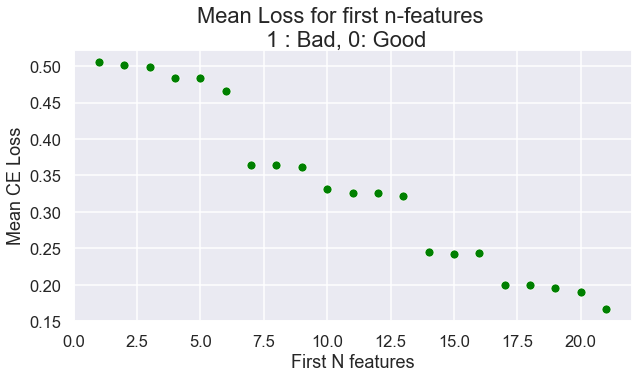

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Mean Loss for first n-features \n 1 : Bad, 0: Good', fontsize = 22, y = 1)

sns.scatterplot(data=n_feat_df, x="n_features", y="mean_ce_loss", color = 'green')
axes.set(xlabel='First N features', ylabel='Mean CE Loss')

[Text(0.5, 0, 'First N features'),
 Text(0, 0.5, '% False Positive'),
 Text(0.5, 1.0, 'False Positive')]

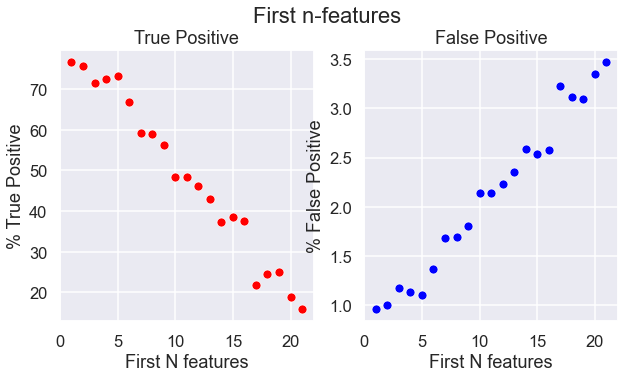

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('First n-features ', fontsize = 22, y = 1)

sns.scatterplot(ax=axes[0], data=n_feat_df, x="n_features", y="true_p", color = 'red')
sns.scatterplot(ax=axes[1],data=n_feat_df, x="n_features", y="false_p", color = 'blue')

axes[0].set(xlabel='First N features', ylabel='% True Positive', title='True Positive')
axes[1].set(xlabel='First N features', ylabel='% False Positive', title='False Positive')

We have considered three things in choosing the best n-features. 

True postives (Maximise)      : Correctly predicting true positives stroke cases.

False positives (Minimise)    : Wrongly predicting negatives to be positives. 

Cross-entropy error (Minimise): Error of model. 

We decided that the best number of features for the logistic regression seems to be the first 5 features.

Our rationale is there is a sharp drop in 'true positives' after feature 5 and it has the lowest cross entropy loss out of the top 5 models measured by 'true positives'. Although we aimed for a lower false positive score, we think the trade off in false positive seems marginal compared to the increase in true positives and decrease in cross entropy loss. 

False positives are less important because we can tell someone they will have stroke and the worse thing that could happen is they overprepared. We would rather someone be prepared to have a stroke and not come true than someone to not be told and eventually have a stroke.

More work can be done to try different combinations of features since we have only tried the first n-features.

Preview of the first 5 columns.

In [40]:
x_train_sm.iloc[:, :5].head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
7728,69.530808,0,0,222.781397,32.359242
6711,71.052758,0,0,102.886883,27.127194
7436,74.000000,0,0,71.830402,27.114102
468,22.000000,0,0,122.100000,23.600000
1545,69.000000,0,1,216.900000,29.800000


## Model 3: 5-feature logistic regression

In [41]:
first_five = x_train_sm.iloc[:, :5]

lr_model_five= lr.fit(first_five,y_train_sm) 
train_accuracy_five = np.mean(lr_model_five.predict(first_five) == y_train_sm)

print('Train Accuracy:',train_accuracy_five)

Train Accuracy: 0.7717730496453901


Model 3 yielded a lower training accuracy of 0.77. The previous logistic model returned a training accuracy of 0.94. We will not observe how well it predicts true positives and false positives.

Confusion matrix, without normalization
[[2633  902]
 [  39  107]]
Normalized confusion matrix
[[0.74483734 0.25516266]
 [0.26712329 0.73287671]]


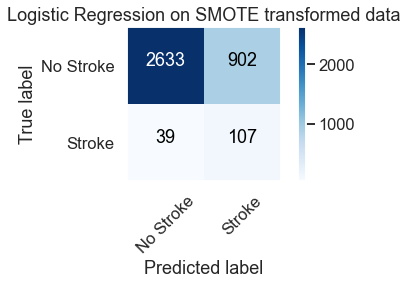

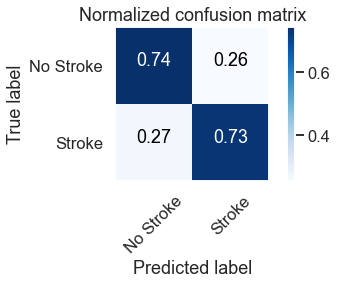

In [42]:
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, lr_model_five.predict(x_train.iloc[:, :5]))
                      ,classes=class_names, normalize=False,
                      title='Logistic Regression on SMOTE transformed data')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, lr_model_five.predict(x_train.iloc[:, :5]))
                      ,classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Discussion

The 5 feature SMOTE logistic regression model is the best performing logistic regression model so far. It predicted 73% of the actual stroke cases (True Positives) and gave a false stroke diagnosis to 27% of the stroke cases (False Positives). However, since the number of stroke cases in the original data set were large, 26% is 902 patients who were falsely told they would have a stroke but did not have a stroke in the end. 902 is still a fairly large number.

##  Model 4: K-Nearest Neighbour Classification

In this section, we will explore classification using K-nearest neighbours. 

The method is similar to the logistic regression. We will train our K-nearest neighbour classifier on the SMOTE transformed data and check the error on the original y_train series.

To start, we will explore what the accuracy of a K = 2 neighbour classification model. 

Confusion matrix, without normalization
[[3456   79]
 [   2  144]]
Normalized confusion matrix
[[0.97765205 0.02234795]
 [0.01369863 0.98630137]]


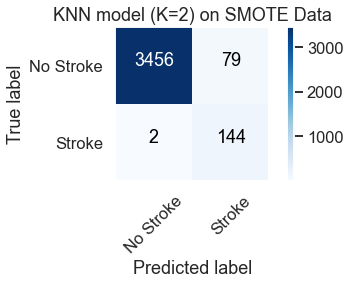

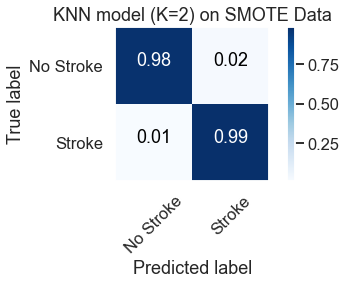

In [43]:
#import model from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

#fitted on smote data, predicted on observed data
knn_2 = knn.fit(x_train_sm, y_train_sm) 
knn_pred = knn_2.predict(x_train)


#model confusion matrix
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, knn_pred)
                      ,classes=class_names, normalize=False,
                      title='KNN model (K=2) on SMOTE Data')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_train, knn_pred)
                      ,classes=class_names, normalize=True,
                      title='KNN model (K=2) on SMOTE Data')

At K =2, the true positives are already at 99% which is very good. The false positives are at 1% which is good also but we would like to find the optimal k value to maximise our true positives and minimise our false positives.

### Optimal Number of K 

This part of the report aims to find the optimal k-value to

i. increase True Positives (Those who are going to have a stroke and are told so)


ii. decrease False Positive  (Those who are NOT going to have a stroke, but are told they will)

In [44]:
#intialise empty array
true_positive = []
false_positive = []

for i in np.arange(1,31):
    knn_new       = KNeighborsClassifier(n_neighbors= i+1)
    knn_model = knn_new.fit(x_train_sm, y_train_sm)
    knn_pred  = knn_model.predict(x_train)
    
    #extract true positive  [3] using .ravel()

    true_p    = confusion_matrix(y_train, knn_pred).ravel()[3]
    true_positive  = np.append(true_positive,  true_p)
    
    #extract false positives [2] using .ravel()
    false_p   = confusion_matrix(y_train, knn_pred).ravel()[2]
    false_positive = np.append(false_positive, false_p)



### Discussion

In [45]:
k_val_df = pd.DataFrame({
    'k_vals' : np.arange(1,31)
    
})
k_val_df['true_p'] = 100* true_positive/sum(y_train == 1)
k_val_df['false_p'] = 100*false_positive/sum(y_train == 0)
k_val_df['difference'] = k_val_df['true_p']  - k_val_df['false_p']
k_val_df.sort_values('difference', ascending = False)

,k_vals,true_p,false_p,difference
3,4,100.000000,0.000000,100.00000
4,5,100.000000,0.000000,100.00000
5,6,100.000000,0.000000,100.00000
2,3,99.315068,0.028289,99.28678
1,2,99.315068,0.028289,99.28678
0,1,98.630137,0.056577,98.57356
6,7,98.630137,0.056577,98.57356
7,8,98.630137,0.056577,98.57356
8,9,97.945205,0.084866,97.86034
9,10,97.945205,0.084866,97.86034


[Text(0.5, 0, 'K Neighbours'),
 Text(0, 0.5, '% False Positive'),
 Text(0.5, 1.0, 'False Positive')]

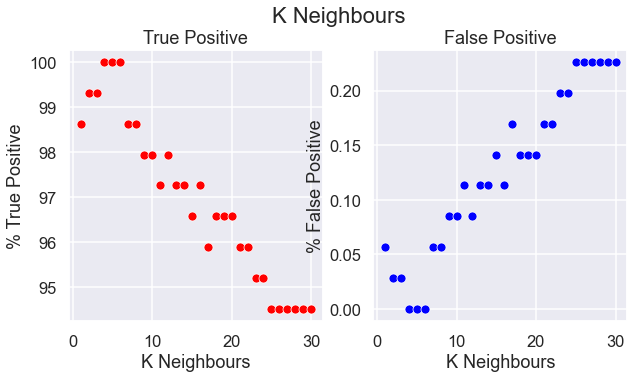

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('K Neighbours', fontsize = 22, y = 1)


sns.scatterplot(ax=axes[0], data=k_val_df, x="k_vals", y="true_p", color = 'red')




sns.scatterplot(ax=axes[1],data=k_val_df, x="k_vals", y="false_p", color = 'blue')


axes[0].set(xlabel='K Neighbours', ylabel='% True Positive', title='True Positive')
axes[1].set(xlabel='K Neighbours', ylabel='% False Positive', title='False Positive')

The two scatterplots above show a cluster of three points at k =4,5,6 where true positives are maximised (100%) and false positives are minimsed (0%). This is the ideal case that our team is looking for. Therefore we conclude that the K-nearest neighbour models of K = 4,5,6 are ideal models for predicting stroke on the training data.

# Final Model Selection

So far, our group has been judging the accuracy of the model based on its performance on the original training data.

In this part of the report, we will reveal the test scores for each of the models. 

* Model 1: Logistic Regression (non-SMOTE)
* Model 2: All feature Logistic Regression (SMOTE)
* Model 3: 5 Feature Logistic Regression (SMOTE)
* Model 4: K-Nearest Neighbour Classification (Best K value)

## Model 1

Logistic Regression (trained on non-SMOTE data)

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]
Confusion matrix, without normalization
[[1165    0]
 [  63    0]]


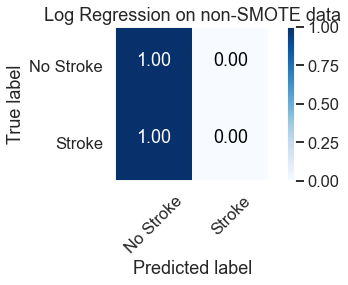

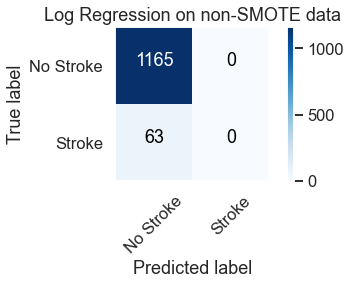

In [47]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr_model = lr.fit(x_train,y_train) 

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model.predict(x_test))
                      ,classes=class_names, normalize=True,
                      title='Log Regression on non-SMOTE data')
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model.predict(x_test))
                      ,classes=class_names, normalize=False,
                      title='Log Regression on non-SMOTE data')

## Model 2

All feature logistic regression (SMOTE)

Normalized confusion matrix
[[0.97339056 0.02660944]
 [0.84126984 0.15873016]]
Confusion matrix, without normalization
[[1134   31]
 [  53   10]]


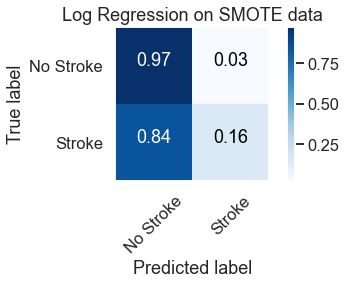

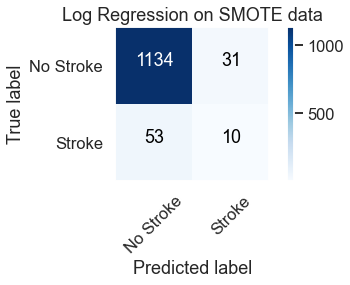

In [48]:
lr_model_smote = lr.fit(x_train_sm,y_train_sm) 
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model_smote.predict(x_test))
                      ,classes=class_names, normalize=True,
                      title='Log Regression on SMOTE data')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model_smote.predict(x_test))
                      ,classes=class_names, normalize=False,
                      title='Log Regression on SMOTE data')

## Model 3

Logistic Regression (first 5 features, trained on SMOTE data)

Normalized confusion matrix
[[0.74420601 0.25579399]
 [0.3015873  0.6984127 ]]
Confusion matrix, without normalization
[[867 298]
 [ 19  44]]


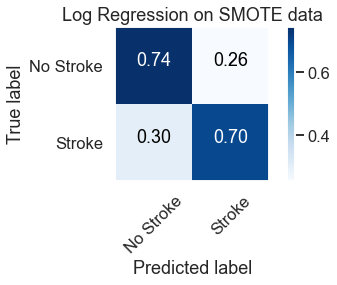

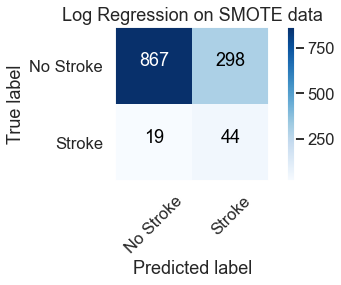

In [49]:
first_five = x_train_sm.iloc[:, :5]

lr_model_five= lr.fit(first_five,y_train_sm) 
plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model_five.predict(x_test.iloc[:, :5]))
                      ,classes=class_names, normalize=True,
                      title='Log Regression on SMOTE data')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, lr_model_five.predict(x_test.iloc[:, :5]))
                      ,classes=class_names, normalize=False,
                      title='Log Regression on SMOTE data')

## Model 4

KNN Classifier Regression (k = 4,5,6)

Normalized confusion matrix
[[0.96223176 0.03776824]
 [0.         1.        ]]
Confusion matrix, without normalization
[[1121   44]
 [   0   63]]


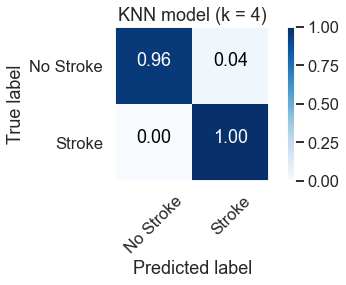

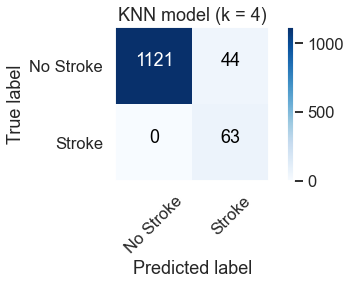

In [50]:
knn_4 = KNeighborsClassifier(n_neighbors=4)

knn_4 = knn.fit(x_train_sm, y_train_sm) #fitted on smote data, predicted on observed data
knn_pred_4 = knn_4.predict(x_test)

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, knn_pred_4)
                      ,classes=class_names, normalize=True,
                      title='KNN model (k = 4)')

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, knn_pred_4)
                      ,classes=class_names, normalize=False,
                      title='KNN model (k = 4)')

Normalized confusion matrix
[[0.96223176 0.03776824]
 [0.         1.        ]]


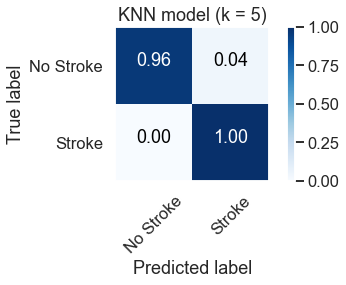

In [51]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5 = knn.fit(x_train_sm, y_train_sm) #fitted on smote data, predicted on observed data
knn_pred_5 = knn_5.predict(x_test)

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, knn_pred_5)
                      ,classes=class_names, normalize=True,
                      title='KNN model (k = 5)')

Normalized confusion matrix
[[0.96223176 0.03776824]
 [0.         1.        ]]


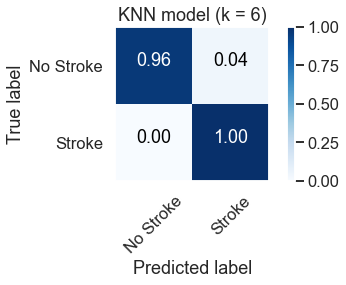

In [52]:
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6 = knn.fit(x_train_sm, y_train_sm) #fitted on smote data, predicted on observed data
knn_pred_6 = knn_6.predict(x_test)

plt.figure()
plt.grid(False)
plot_confusion_matrix(confusion_matrix(y_test, knn_pred_6)
                      ,classes=class_names, normalize=True,
                      title='KNN model (k = 6)')

# Conclusion

This table shows the results of our four models on the predicting the test ('unseen') data


|Model Number| Model Description | True Positive (%) & Number | False Positive (%) & Number|
| --- |:--- |:--- |:--- |
|1|Logistic Regression trained on original data|0% (0)|0% (0)|
|2|Logistic Regression trained on SMOTE data|16% (10)|3% (31)|
|3|Logistic Regression trained on first 5 features|70% (44)|26% (298)|
|4|K-nearest neighbour classification|100% (63)|4% (44)|

In [53]:
model_description = ('Logistic Regression trained on original data','Logistic Regression trained on SMOTE data',
                    'Logistic Regression trained on first 5 features','K-nearest neighbour classification')
#create a data frame to plot the results
model_conc = pd.DataFrame({
    'model_number' : [1,1,2,2,3,3,4,4],
    'model_description': [model_description[0],model_description[0],
                          model_description[1],model_description[1],
                          model_description[2],model_description[2],
                          model_description[3],model_description[3]], 
    'percent': [0,0,16,3,70,26,100,4],
    'metric': ['Model True P', 'Model False P',
              'Model True P', 'Model False P',
              'Model True P', 'Model False P',
              'Model True P', 'Model False P']
})

Text(0.5, 0, 'Model Number')

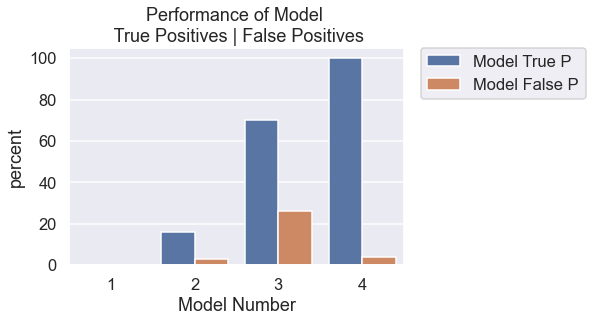

In [54]:
#plot results of findings
sns.barplot(x="model_number", y="percent", hue = 'metric',
            data=model_conc)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Performance of Model \n True Positives | False Positives')
plt.xlabel('Model Number')


<ins >Learning Points: <ins>
    
We have started our research question to accurately predict stroke. 
    
We have learnt about choosing the correct metric to measure the performance of our models. The performance metric we have chosen to accurately predict stroke are the True Positives and False Positives. We wanted to maximise the number of True Positives so that those who wil have stroke are diagnosed with stroke. We wanted to minimise the number of False Positive to reduce any anxiety from a misdiagnosis of stroke for those who will not have stroke. 

We have learnt that it is very important to work with balanced data.
    
__Model 1__: The logistic model that was trained on unbalanced data had a very high accuracy of 96%. However this is because accuracy measures the number of total correct predictions. Since the data had more non-stroke patients, it could accurately predict non-strokes, but that is not our goal. The high accuracy of model 1 only shows that the model is good at predicting non-stroke cases. 
    
__Model 2__: Model 2 was trained on the SMOTE transformed data which reduced accuracy to 95% from model 1. Although accuracy was reduced, the number of true positives increased from 0 to 22. This is slight improvement. The number of false postives increased from 0 to 93, which is bad but not as important as the increase in true positives. 
    
__Model 3__: Model 3 was trained on the SMOTE transformed data and cut from 22 features to only 5 features. This was done through the process of feature engineering where the first n-features were calculated to 
    
* maximise true positives
* minimise false positives
* minimise cross entropy loss

It was found that the logistic regression model that have the first 5 features had the best performance. 
    
__Model 4__: We found that the K-nearest neighbour classification for k=4,5,6 gave the highest true positive score of 100% and the lowest false positive score of 0%. 


<ins> Shortcomings: <ins>
    
At the beginning we removed 201 rows which had NAs in the BMI section. Those 201 rows might have provided crucial training data in other columns that could help make our model perform better.
    
The feature engineering process for model 3 was not a robust method. We only looked at the first 5 features but there are many other permutations of features that might possibly lead to best results. 

<ins> Ideas for possible future research <ins>
    
Further work can be done to mix and match features to create a better predicting logistic regression model. We could also try to insert dummy values for the NA BMI rows instead of just taking out the data, or dropping BMI in our models.
